<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

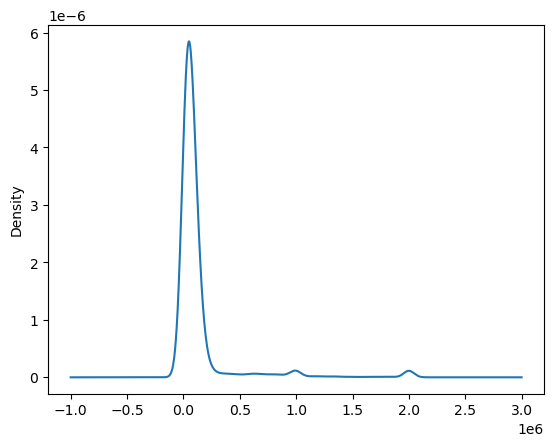

In [3]:
df.ConvertedComp.plot(kind='kde')


Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

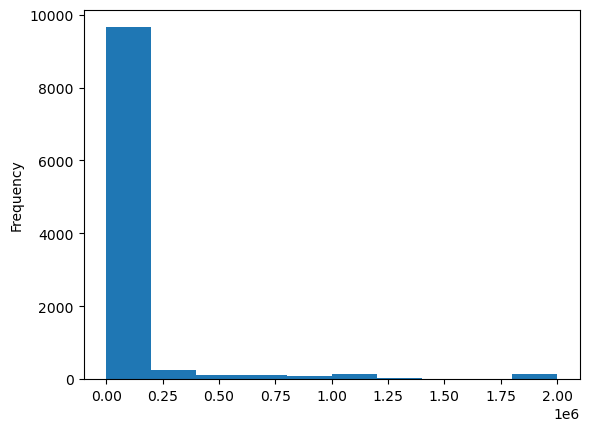

In [4]:
df.ConvertedComp.plot(kind='hist')

What is the median of the column `ConvertedComp`?


In [5]:
df.ConvertedComp.median()

57745.0

In [6]:
df.Age.median()

29.0

How many responders identified themselves only as a **Man**?


In [7]:
df.Gender.value_counts().Man

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
df[df.Gender=='Woman'].ConvertedComp.median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
def five_summary(series): 
    summary = series.describe().rename(index={'25%':'q1', '50%':'mid', '75%':'q3'})
    return summary[['min', 'q1', 'mid', 'q3', 'max']]

five_summary(df.Age)

min    16.0
q1     25.0
mid    29.0
q3     35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:>

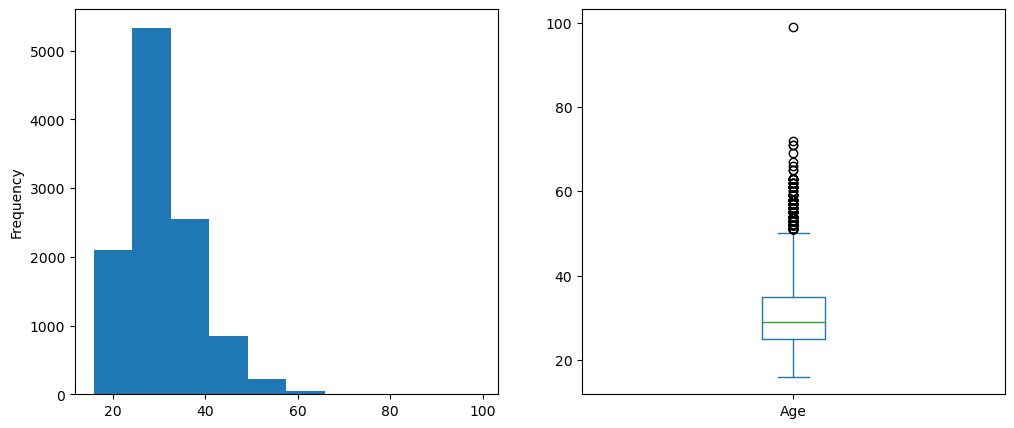

In [32]:
plt.subplot(1, 2, 1)
df.Age.plot(kind='hist')

plt.subplot(1, 2, 2)
df.Age.plot(kind='box', figsize=(12,5))


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

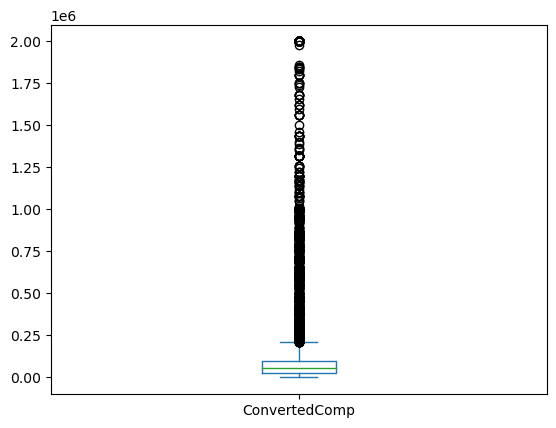

In [11]:
df.ConvertedComp.plot(kind='box')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
converted_comp_5 = five_summary(df.ConvertedComp)
converted_comp_5

min          0.0
q1       26868.0
mid      57745.0
q3      100000.0
max    2000000.0
Name: ConvertedComp, dtype: float64

In [13]:
iqr = converted_comp_5.q3 - converted_comp_5.q1
iqr

73132.0

Find out the upper and lower bounds.


In [22]:
lower_bound, upper_bound = (converted_comp_5.q1 - iqr*1.5, converted_comp_5.q3 + iqr*1.5)
f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}'

'Lower Bound: -82830.0, Upper Bound: 209698.0'

Identify how many outliers are there in the `ConvertedComp` column.


In [23]:
outlier_filter = df.ConvertedComp.le(lower_bound) | df.ConvertedComp.ge(upper_bound)
num_outliers = len(df[outlier_filter])
f'There are {num_outliers} outliers (out of {len(df)}).'

'There are 879 outliers (out of 11398).'

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:
df2 = df.drop(df[outlier_filter].index)

outlier_filter = df2.ConvertedComp.le(lower_bound) | df2.ConvertedComp.ge(upper_bound)
num_outliers = len(df2[outlier_filter])
f'There are {num_outliers} outliers (out of {len(df2)}).'

'There are 0 outliers (out of 10519).'

In [25]:
five_summary(df2.ConvertedComp)

min         0.0
q1      24060.0
mid     52704.0
q3      85574.5
max    209356.0
Name: ConvertedComp, dtype: float64

In [33]:
df2.ConvertedComp.mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [37]:
df.corr().Age.drop(index=['Age'])

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64

In [36]:
df.corr().Age.drop(index=['Age'])

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
